# Analisi dei disastri aerei dal 1919 al 2023

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [4]:
csv_url = "/content/drive/MyDrive/Colab Notebooks/aviation-accidents.csv"
disasters_df = pd.read_csv(csv_url)
disasters_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [5]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [6]:
disasters_df.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

# Pulizia dei dati

**Eliminazione dei valori mancanti nella colonna Operator**


In [7]:
disasters_df = disasters_df.dropna(subset=['operator'])

In [8]:
disasters_df.isnull().sum()

date               0
type               0
registration    1546
operator           0
fatalities      3937
location         948
country            0
cat                0
year               0
dtype: int64

**Modifica dei valori mancanti in Registration e Location**

In [58]:
disasters_df['registration'].fillna('Unknown', inplace=True)
disasters_df['registration'].isnull().sum()

0

In [59]:
disasters_df['location'].fillna('Location Unknown', inplace=True)
disasters_df['location'].isnull().sum()

0

**Statistiche descrittive per Fatalities**

Verifico che i dati di Fatalities siano di tipo numerico. Successivamente calcolo i valori statistici per capire come gestire le osservazioni mancanti.

Il valore della mediana di "fatalities" è 0.0. Questo significa che almeno la metà degli incidenti registrati non ha avuto morti. Si nota una discrepanza tra la media (circa 6.14 morti per incidente) e la mediana (0 morti per incidente): questo dimostra una distribuzione dei dati asimmetrica a destra (positivamente distorta). Dunque, la maggior parte degli incidenti ha poche o nessuna vittima, ma pochi incidenti molto gravi alzano significativamente il valore medio dei decessi.

In [56]:
disasters_df['fatalities'] = pd.to_numeric(disasters_df['fatalities'], errors='coerce')
fatalities_stats = disasters_df['fatalities'].describe()
fatalities_stats

count    23963.000000
mean         5.038142
std         17.094865
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        520.000000
Name: fatalities, dtype: float64

In [14]:
median_fatalities = disasters_df['fatalities'].median()
median_fatalities

0.0

#**La mediana, essendo pari a 0 in questo caso, riflette la "tipicità" degli incidenti senza vittime.**

Per avere ulteriore conferma, costruiamo un istogramma escludendo le osservazioni con valori mancanti, per comprendere meglio la frequenza. Dal grafico, si evince che buona parte degli incidenti registrati non ha causato vittime (dato che quando il numero di morti è 0 si registra la frequenza più alta).
Di conseguenza, sostituiamo i valori mancanti con 0 (valore della mediana), assumendo che, in assenza di informazioni, si presume un incidente senza perdite umane.


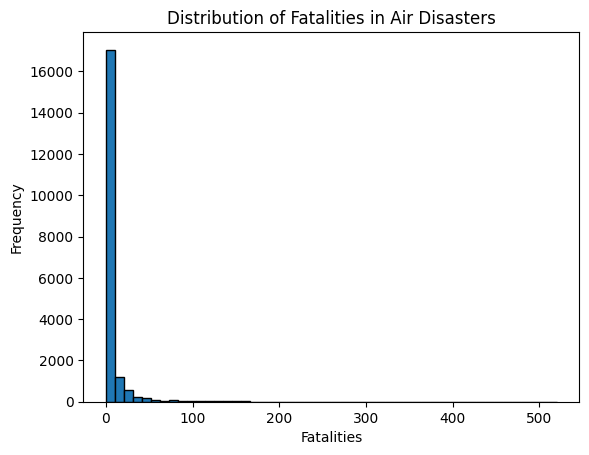

In [15]:
plt.hist(disasters_df['fatalities'].dropna(), bins=50, edgecolor='k')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.title('Distribution of Fatalities in Air Disasters')
plt.show()

In [16]:
disasters_df['fatalities'].fillna(median_fatalities, inplace=True)
disasters_df.isnull().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

# Analisi dati

# Gli **Stati Uniti** rappresentano la nazione che ha registrato il maggior numero di incidenti aerei.

Questo potrebbe essere dovuto all'elevato traffico aereo presente negli USA, con migliaia di voli commerciali, militari, privati giornalieri, ecc. Anche le condizioni meteorologiche e geografiche rappresentano uno dei fattori che influenza tali valori.



In [17]:
#conteggio del numero di incidenti per nazione
incident_counts_by_country = disasters_df['country'].value_counts()
incident_counts_by_country.head()

USA                4377
Russia             1422
Unknown country     838
U.K.                837
Canada              826
Name: country, dtype: int64

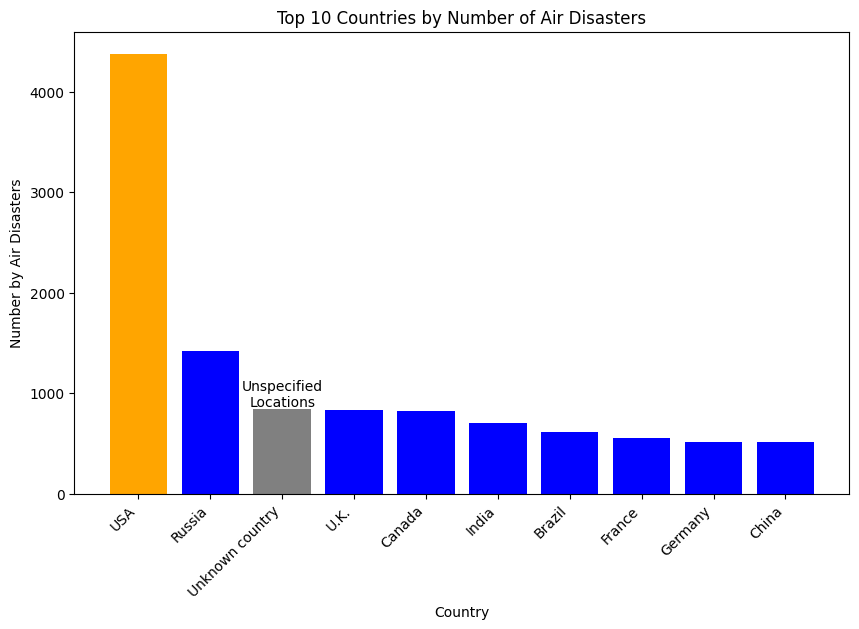

In [18]:
top_countries = incident_counts_by_country.head(10)
plt.figure(figsize=(10, 6))
colors = ['orange', 'blue', 'gray'] + ['blue'] * (len(top_countries)-3)
bars = plt.bar(top_countries.index, top_countries.values, color=colors)
plt.title("Top 10 Countries by Number of Air Disasters")
plt.xlabel("Country")
plt.ylabel("Number by Air Disasters")
plt.xticks(rotation=45, ha='right')

for bar, label in zip(bars, top_countries.index):
  if label == 'Unknown country':
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, 'Unspecified\nLocations',
             ha='center', va='bottom', fontsize=10, color='black', rotation=0)
plt.show()

**Nota:** La categoria 'Unknown Country' è stata evidenziata in grigio per distinguerla dalle nazioni con localizzazioni ben definite. Questa categorizzazione include incidenti per cui la nazione non è chiaramente specificata nei dati disponibili. Questo potrebbe indicare una varietà di situazioni, inclusi incidenti avvenuti in acque internazionali, in aree contese, o casi in cui le informazioni non erano disponibili o registrate. La presenza di un numero significativo di incidenti in questa categoria sottolinea l'importanza di considerare le incertezze e le limitazioni nei dati durante l'analisi degli incidenti aerei a livello globale.

# Il Venerdì è il giorno in cui si verifica il maggior numero di incidenti.

Dopo aver convertito la colonna `date` in datetime, aggiungiamo una nuova colonna `day_of_week` utilizzando i giorni della settimana. Creiamo un dizionario che assegnerà ad ogni numero (da 0 a 6) i rispettivi nomi dei giorni e applichiamo la mappatura al DataFrame. Effettuiamo il conteggio degli incidenti per ciascun giorno e creiamo il grafico a barre, che rappresenterà la distribuzione degli incidenti per ogni giorno della settimana.





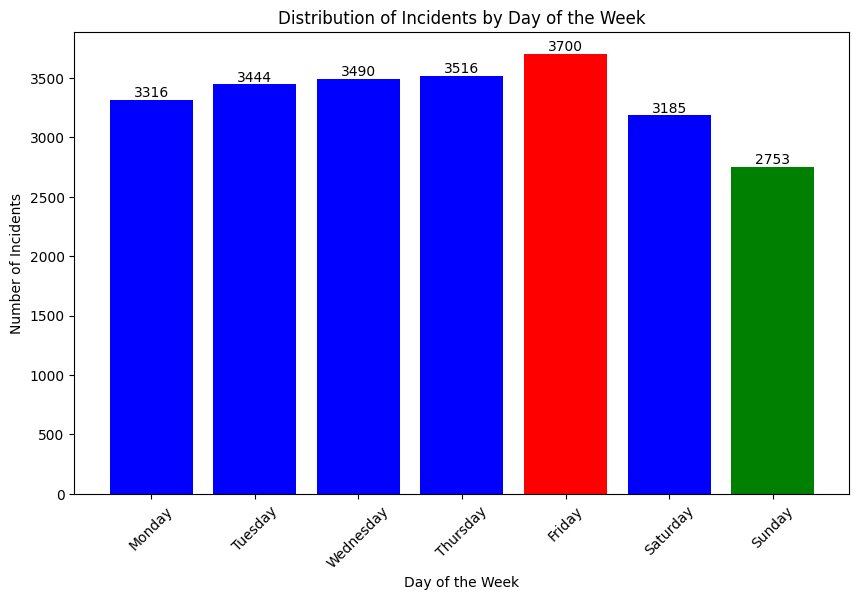

In [60]:
disasters_df['date'] = pd.to_datetime(disasters_df['date'], errors='coerce')

disasters_df['day_of_week'] = disasters_df['date'].dt.dayofweek

day_of_week_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

disasters_df['day_of_week'] = disasters_df['day_of_week'].map(day_of_week_map)

incident_counts_by_day_of_week = disasters_df['day_of_week'].value_counts()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
incident_counts_by_day_of_week = incident_counts_by_day_of_week.reindex(ordered_days)

plt.figure(figsize=(10, 6))
colors = ['blue', 'blue', 'blue', 'blue', 'red', 'blue', 'green']
bars = plt.bar(incident_counts_by_day_of_week.index, incident_counts_by_day_of_week.values, color=colors)
plt.title("Distribution of Incidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

Dal grafico si nota che è il venerdì il giorno in cui si verificano più incidenti. Questo potrebbe essere dovuto ad alcuni fattori:


*   Aumento della richiesta di viaggi, in quanto il venerdì è associato all'inizio del fine settimana, dunque potrebbero esserci più voli programmati e di conseguenza una maggiore probabilità di incidenti.
*   Fattori umani, in quanto le persone potrebbero essere concentrate sul fine settimana prossimo, con un conseguente aumento del rischio di errori di giudizio, nella comunicazione o nel processo decisionale.

Tuttavia, dal grafico non si ravvisa una notevole differenza nel numero di incidenti con gli altri giorni della settimana, se non per la domenica, giorno in cui si riduce il numero di voli commerciali e/o viaggi d'affari, maggiormente frequenti nei giorni feriali.

# Gli operatori più sicuri, considerando il numero di incidenti e di vittime, sono i seguenti.
Non avendo a disposizione dati sul numero totale di voli o sulle ore volate per operatore, calcoliamo il totale di incidenti e il totale di morti per operatore, unendoli in un unico dataframe. A questo punto stampiamo gli operatori con un solo incidente e nessuna vittima, che rappresenteranno quelli più sicuri.

In [34]:
fatalities_by_operator = disasters_df.groupby('operator')['fatalities'].sum()
incidents_by_operator = disasters_df.groupby('operator').size()
safety_summary = pd.DataFrame({
    'Total Fatalities': fatalities_by_operator,
    'Number of Incidents': incidents_by_operator
}).reset_index()

filtered_operators = safety_summary[(safety_summary['Number of Incidents'] == 1) & (safety_summary['Total Fatalities'] == 0)]
filtered_operators.reset_index(drop=True, inplace=True)
filtered_operators.head(10)

,operator,Total Fatalities,Number of Incidents
0,", op.for UN",0.0,1
1,09 Charlie,0.0,1
2,1982-047 LLC,0.0,1
3,2M Leasing,0.0,1
4,40-Mile Air,0.0,1
5,987 Investments,0.0,1
6,A.R. Wings,0.0,1
7,AAA Investments,0.0,1
8,ABA Aviation Resources,0.0,1
9,ABS Equipment Leasing,0.0,1


# Il velivolo che ha causato il maggior numero di morti è il **Douglas C-47A (DC-3)**

Raggruppiamo il numero totale di vittime per tipologia di velivolo in ordine decrescente.
Successivamente rappresentiamo in un grafico a barre il numero di vittime suddiviso per 10 tipologie di velivoli, distinguendo quello che ha provocato il maggior numero di morti.


In [21]:
fatalities_by_type = disasters_df.groupby('type')['fatalities'].sum()
fatalities_sorted = fatalities_by_type.sort_values(ascending=False)
fatalities_sorted.head(10)

type
Douglas C-47A (DC-3)        5689.0
Douglas C-47 (DC-3)         2619.0
Douglas C-47B (DC-3)        1994.0
Tupolev Tu-154M             1395.0
Ilyushin Il-18V             1356.0
DC-9-32                     1207.0
Lockheed C-130H Hercules    1192.0
Antonov An-26               1163.0
Junkers Ju-52/3m            1114.0
Douglas DC-6B               1040.0
Name: fatalities, dtype: float64

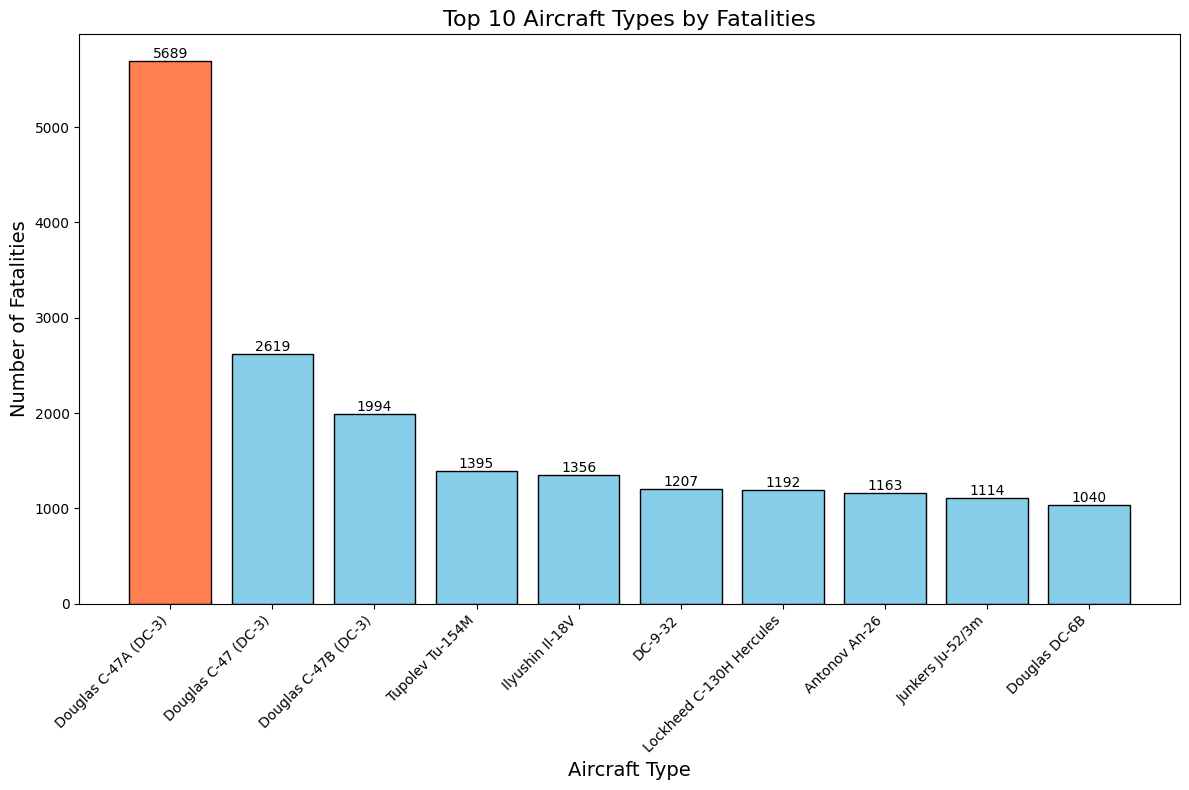

In [22]:
top_fatalities_by_type = fatalities_sorted.head(10)
plt.figure(figsize=(12, 8))
colors = ['coral' if i == top_fatalities_by_type.values[0] else 'skyblue' for i in top_fatalities_by_type.values]
bars = plt.bar(top_fatalities_by_type.index, top_fatalities_by_type.values, color=colors, edgecolor='black')

plt.title('Top 10 Aircraft Types by Fatalities', fontsize=16)
plt.xlabel('Aircraft Type', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.xticks(rotation=45, ha="right")

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Dopo l'11 Settembre si registra una graduale diminuzione del numero di incidenti aerei nel tempo.

Consideriamo inizialmente gli incidenti aerei che si sono verificati dopo l'11 Settembre 2001, aggiungendo una colonna `year` agevolando la successiva aggregazione degli incidenti per anno.
Costruiamo un grafico a linee che rappresenta l'andamento del numero di incidenti per anno dopo la suddetta data.


In [23]:
post_911_data = disasters_df[disasters_df['date'] > '2001-09-11'].copy()

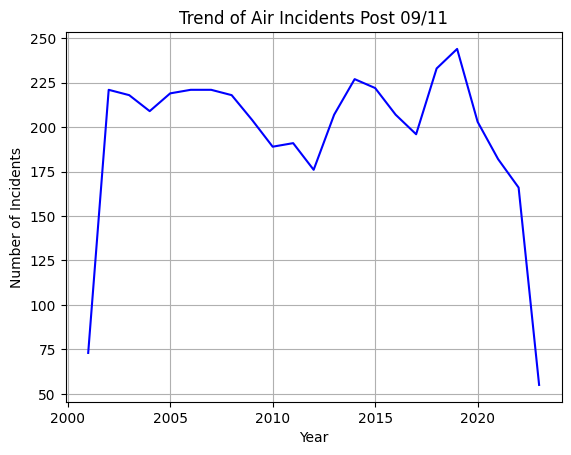

In [24]:
post_911_data['year'] = post_911_data['date'].dt.year
incidents_by_year = post_911_data.groupby('year').size()
incidents_by_year.plot(kind='line', color = 'blue')
plt.title('Trend of Air Incidents Post 09/11')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid()
plt.show()

**NOTA**: dal grafico si osserva una tendenza generale alla diminuzione del numero di incidenti aerei dal 2001 in poi, con picchi tra il 2014 e il 2015 e tra il 2019 e 2020. La diminuzione generale può essere attribuita all'introduzione di misure di sicurezza più rigide a livello internazionale e l'utilizzo di tecnologie più avanzate per la manutenzione e il monitoraggio degli aeromobili. Dal 2020 in poi c'è una netta diminuzione degli incidenti, dovuta all'impatto della pandemia di COVID-19 che ha ridotto il traffico aereo globale, diminuendo la probabilità di incidenti.

# Anche la gravità degli incidenti per anno si è ridotta in maniera progressiva

Dopo l'aggiunta della colonna `year`, raggruppiamo il numero totale di vittime per anno per costruire un grafico a linee che rappresenti l'evoluzione annuale del numero di morti negli incidenti aerei dal 2001 in poi.

In [25]:
disasters_df['date'] = pd.to_datetime(disasters_df['date'])
post_911_data = disasters_df[disasters_df['date'] > '2001-09-11'].copy()

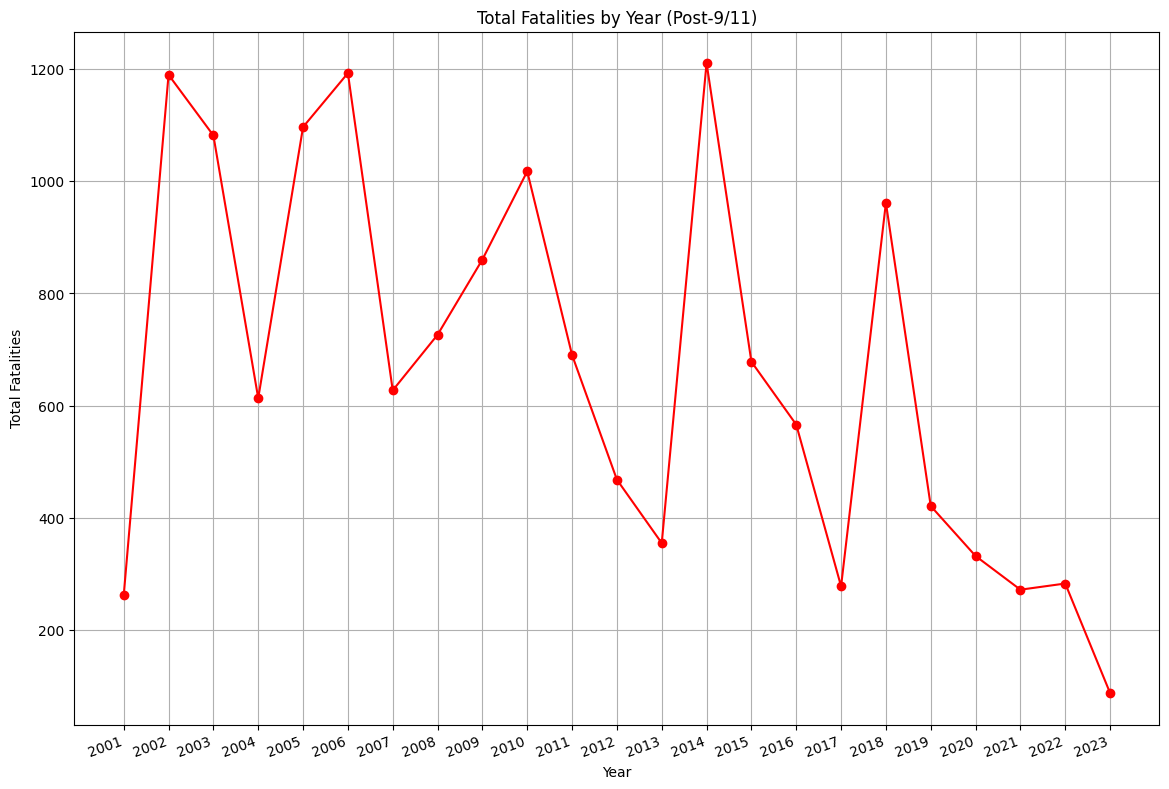

In [26]:
post_911_data['year'] = post_911_data['date'].dt.year

fatalities_by_year = post_911_data.groupby('year')['fatalities'].sum()

plt.figure(figsize=(14, 9))
plt.plot(fatalities_by_year.index, fatalities_by_year.values, marker='o', linestyle='-', color='r')
plt.title('Total Fatalities by Year (Post-9/11)')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.xticks(ticks=fatalities_by_year.index, rotation=20, ha="right")
plt.show()

Da tale grafico emerge una progressiva diminuzione generale del numero di morti nel tempo, con picchi negli anni 2002, 2006, 2014.
Questo andamento offre un'indicazione diretta anche sulla gravità degli incidenti aerei in termini di vittime, che, grazie al miglioramento delle pratiche di sicurezza aerea, l'avanzamento tecnologico e la formazione del personale, si è ridotta notevolmente dal 2001 al 2023.

# La mappa rappresenta la distribuzione geografica del numero di incidenti per nazione: gli USA registrano il numero più alto di incidenti aerei.

Dopo aver caricato i confini delle nazioni in un GeoDataFrame, uniamo quest'ultimo con il numero di incidenti  per nazione. Per le nazioni non presenti nel set di dati imposteremo il conteggio degli incidenti a 0.
Prima di procedere alla creazione del cartogramma, controlliamo che i nomi delle nazioni del DataFrame corrispondano o meno a quelli del GeoDataFrame e mappiamo i nomi dei paesi che devono essere standardizzati.
Creiamo un cartogramma, dove la scala di colori rappresenterà i diversi conteggi per nazione.

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

incident_counts = disasters_df['country'].value_counts().reset_index()
incident_counts.columns = ['country', 'incident_counts']

world = world.merge(incident_counts, how="left", left_on="name", right_on="country")

world['incident_counts'].fillna(0, inplace=True)

In [49]:
print(disasters_df['country'].unique())

['Unknown country' 'Russia' 'Eritrea' 'Libya' 'Poland' '?' 'India'
 'Bulgaria' 'Bahamas' 'Zimbabwe' 'Mauritania' 'Cyprus' 'Mexico'
 'New Caledonia' 'Honduras' 'Peru' 'Kenya' 'Antarctica' 'Latvia' 'Yemen'
 'Ukraine' 'France' 'Liberia' 'Italy' 'U.K.' 'South Africa' 'Sudan'
 'Sweden' 'Cuba' 'Belgium' 'China' 'Atlantic Ocean' 'Netherlands'
 'Germany' 'USA' 'Iran' 'Chile' 'Israel' 'Argentina' 'P.N. Guinea'
 'Nicaragua' 'Czech Rep.' 'Dominican Rep.' 'Brazil' 'Mediterranean Sea'
 'Indonesia' 'Egypt' 'Bolivia' 'Spain' 'Australia' 'Iraq' 'Guatemala'
 'Malta' 'Colombia' 'Switzerland' 'Austria' 'Uganda' 'Trinidad & Tobago'
 'Norway' 'Greece' 'Algeria' 'Pakistan' 'Panama' 'Romania' 'Morocco'
 'Pacific Ocean' 'Hungary' 'Jamaica' 'Japan' 'Canada' 'Gambia' 'Thailand'
 'Philippines' 'Ecuador' 'Puerto Rico' 'Venezuela' 'Mozambique'
 'Singapore' 'Myanmar' 'Djibouti' 'Gibraltar' 'Costa Rica' 'Indian Ocean'
 'Denmark' 'Finland' 'Estonia' 'Vietnam' 'Tanzania' 'Iceland' 'Benin'
 'Portugal' 'Uzbekistan' 'Eth

In [51]:
print(world['name'].unique())

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

In [61]:
country_mapping = {
    "USA": "United States of America",
    "Alaska": "United States of America",
    "U.K.": "United Kingdom",
    "P.N. Guinea": "Papua New Guinea",
    "Czech Rep.": "Czech Republic",
    "Dominican Rep.": "Dominican Republic",
    "Russian Federation": "Russia",
    "Iran": "Iran, Islamic Republic of",
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Bolivia": "Bolivia, Plurinational State of",
    "Moldova": "Moldova, Republic of",
    "Syria": "Syrian Arab Republic",
    "Tanzania": "Tanzania, United Republic of",
    "Vietnam": "Viet Nam",
    "Laos": "Lao People's Democratic Republic",
    "North Korea": "Korea, Democratic People's Republic of",
    "South Korea": "Korea, Republic of",
}

disasters_df['country'] = disasters_df['country'].map(country_mapping).fillna(disasters_df['country'])

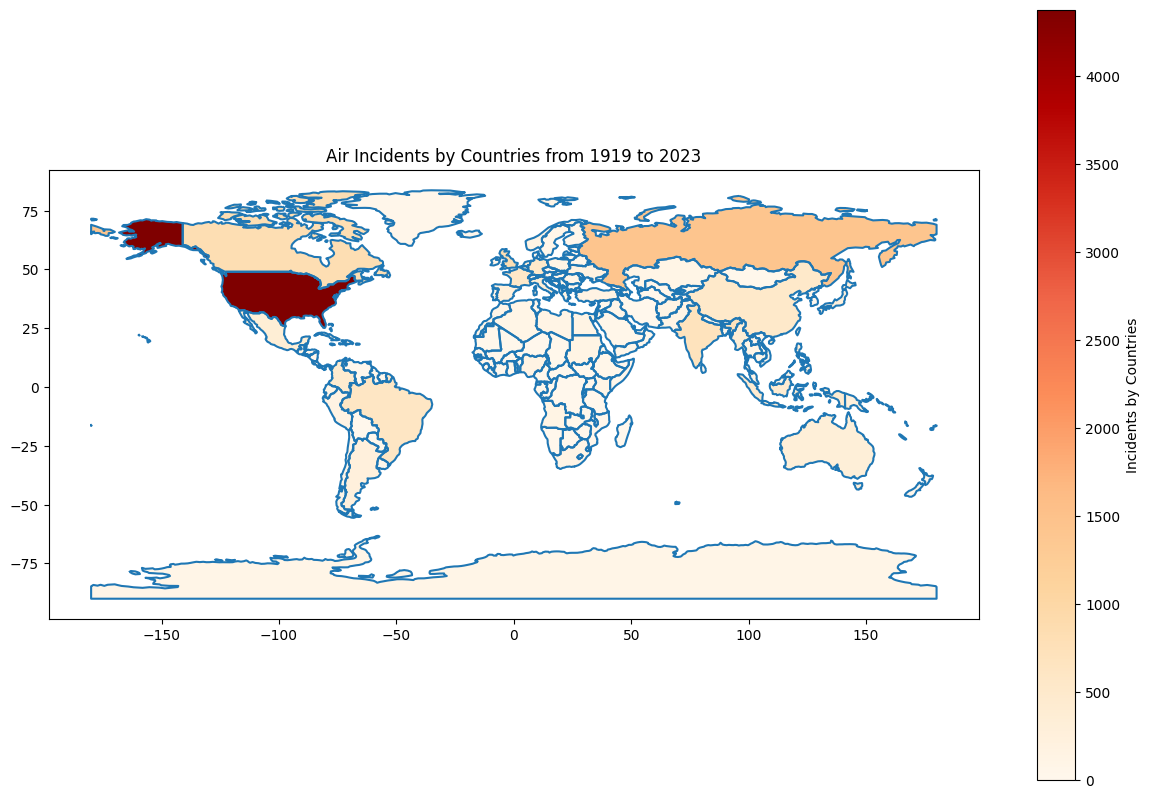

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='incident_counts', ax=ax, legend=True,
           legend_kwds={'label': "Incidents by Countries"},
           cmap='OrRd')
plt.title('Air Incidents by Countries from 1919 to 2023')
plt.show()